<a href="https://colab.research.google.com/github/karthik038/GIVA-company-assisgnment/blob/main/GIVA_Forecast_analysis_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
* What is the expected forecast for Dec closure? Feel free to use time series or any predictive technique to determine the same. You may take the help of R as well. In case legacy data is needed, please feel free to make assumptions

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/drive/MyDrive/GIVA/GIVA Analysis report.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
1,NaN,2021-09-01 00:00:00,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
2,NaN,2021-09-02 00:00:00,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
3,NaN,2021-09-03 00:00:00,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.07668,0.260013,311,0.019644
4,NaN,2021-09-04 00:00:00,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,NaN,2021-12-17 00:00:00,18208,1703,4573,10813,0.251153,37544,10308,0.274558,2934,0.078148,0.284633,772,0.020563
109,NaN,2021-12-18 00:00:00,15839,1586,3612,11520,0.228045,29238,11095,0.379472,2976,0.101785,0.268229,784,0.026814
110,NaN,2021-12-19 00:00:00,20939,1643,4349,10290,0.207699,32057,9182,0.286427,2374,0.074056,0.258549,588,0.018342
111,NaN,2021-12-20 00:00:00,18982,1711,3027,10297,0.159467,35508,9399,0.264701,3202,0.090177,0.340675,783,0.022051


In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(index=df.index[0], axis=0, inplace=True)
df

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
1,2021-09-01 00:00:00,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
2,2021-09-02 00:00:00,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
3,2021-09-03 00:00:00,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.07668,0.260013,311,0.019644
4,2021-09-04 00:00:00,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
5,2021-09-05 00:00:00,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021-12-17 00:00:00,18208,1703,4573,10813,0.251153,37544,10308,0.274558,2934,0.078148,0.284633,772,0.020563
109,2021-12-18 00:00:00,15839,1586,3612,11520,0.228045,29238,11095,0.379472,2976,0.101785,0.268229,784,0.026814
110,2021-12-19 00:00:00,20939,1643,4349,10290,0.207699,32057,9182,0.286427,2374,0.074056,0.258549,588,0.018342
111,2021-12-20 00:00:00,18982,1711,3027,10297,0.159467,35508,9399,0.264701,3202,0.090177,0.340675,783,0.022051


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   112 non-null    object
 1   New Installs           112 non-null    object
 2   Returning Users        112 non-null    object
 3   Uninstalls             112 non-null    object
 4   Net new installs       112 non-null    object
 5   Uninstall rate         112 non-null    object
 6   DAU                    112 non-null    object
 7   Unique Page Views      112 non-null    object
 8   Page view conversion   112 non-null    object
 9   Add to Cart            112 non-null    object
 10  A2C Conv               112 non-null    object
 11  AddtoCart (Prod page)  112 non-null    object
 12  Order Comp             112 non-null    object
 13  Overall Conv           112 non-null    object
dtypes: object(14)
memory usage: 13.1+ KB


In [5]:
df.columns

Index(['Date', 'New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp', 'Overall Conv'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format =True)
df=df.sort_values(by='Date')

In [7]:
df['New Installs '] = df['New Installs '].astype(str).astype(int)
df['Returning Users '] = df['Returning Users '].astype(str).astype(int)
df['Uninstalls '] = df['New Installs '].astype(str).astype(int)
df['Net new installs '] = df['Net new installs '].astype(str).astype(int)
df['Uninstall rate'] = df['Uninstall rate'].astype(str).astype(float)
df['DAU '] = df['DAU '].astype(str).astype(int)
df['Unique Page Views'] = df['Unique Page Views'].astype(str).astype(int)
df['Page view conversion'] = df['Page view conversion'].astype(str).astype(float)
df['Add to Cart'] = df['Add to Cart'].astype(str).astype(int)
df['A2C Conv'] = df['A2C Conv'].astype(str).astype(float)
df['AddtoCart (Prod page)'] = df['AddtoCart (Prod page)'].astype(str).astype(float)
df['Order Comp'] = df['Order Comp'].astype(str).astype(int)
df['Overall Conv'] = df['Overall Conv'].astype(str).astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    int64         
 2   Returning Users        112 non-null    int64         
 3   Uninstalls             112 non-null    int64         
 4   Net new installs       112 non-null    int64         
 5   Uninstall rate         112 non-null    float64       
 6   DAU                    112 non-null    int64         
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    float64       
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    float64       
 11  AddtoCart (Prod page)  112 non-null    float64       
 12  Order Comp             112 non-null    int64         
 13  Overa

In [9]:
df.isnull().sum()

Date                     0
New Installs             0
Returning Users          0
Uninstalls               0
Net new installs         0
Uninstall rate           0
DAU                      0
Unique Page Views        0
Page view conversion     0
Add to Cart              0
A2C Conv                 0
AddtoCart (Prod page)    0
Order Comp               0
Overall Conv             0
dtype: int64

In [10]:
df1 = df.set_index("Date", drop = True)

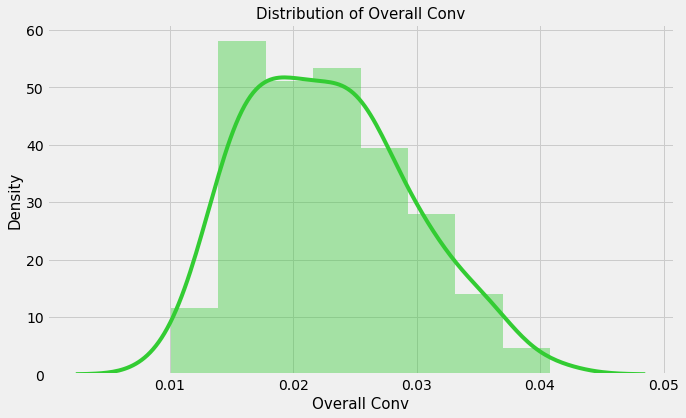

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df1["Overall Conv"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of Overall Conv', fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.xlabel("Overall Conv", fontsize= 15)
plt.show()

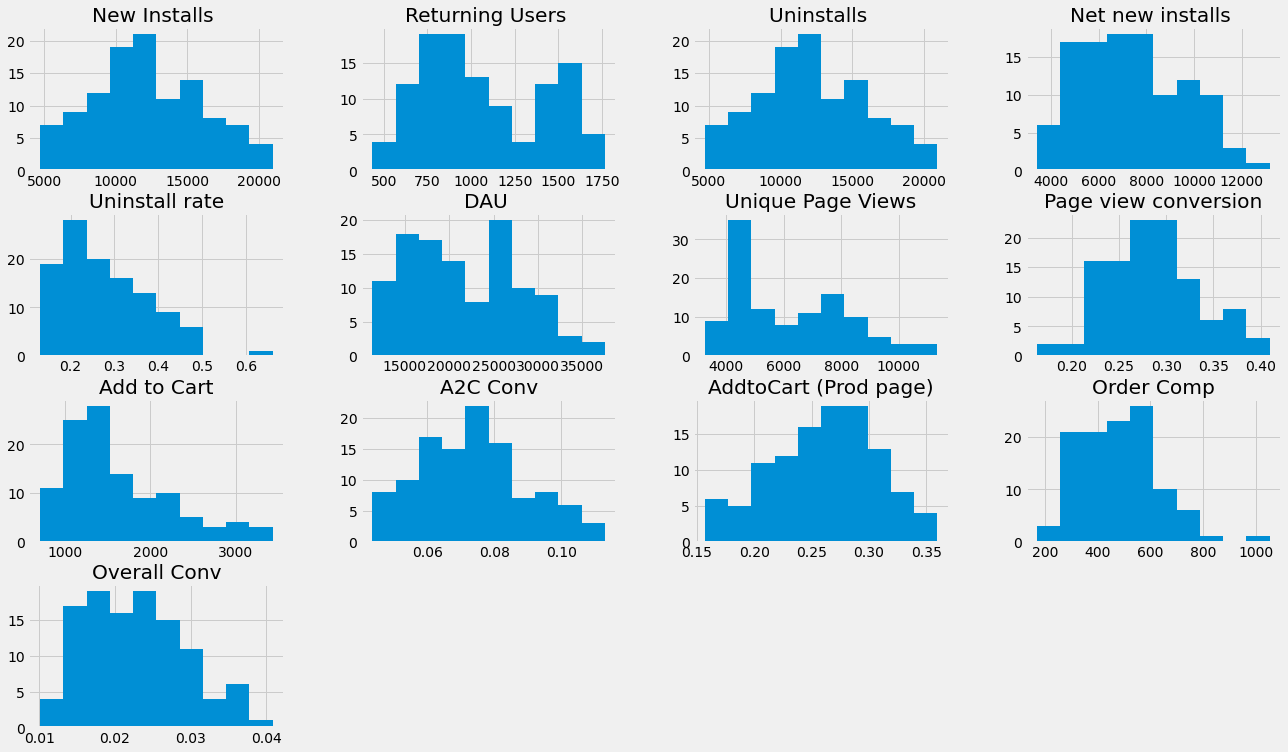

In [12]:
df1.hist(bins=10,figsize=(20,12))
plt.show()

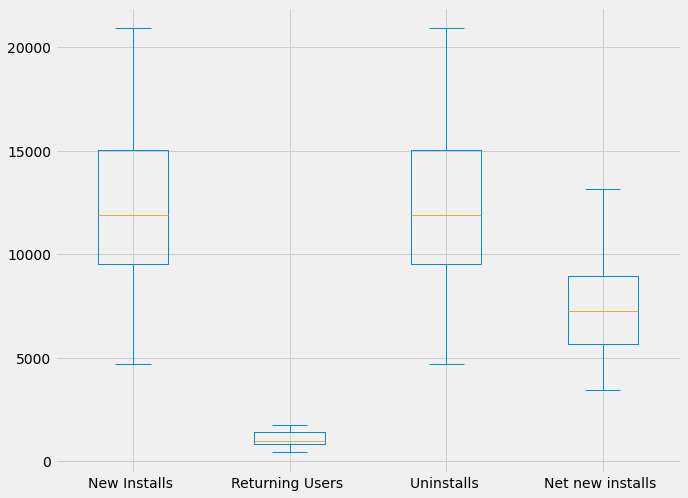

In [13]:
df1.plot(x='Overall Conv', y=['New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs '], kind="box", figsize=(10, 8))
plt.show()

* Here we can see that that the new installs and the uninstalls rate are as same
it can cause a conversion rate so we have to concentrate on the uninstalling customers and resolve the issues to make the existing customers comfortable.

* And and also we can see that the returning users are less in numbers and we have to make a insight of these customers and their purchases. 

* And also we can see there are a good amount of Net new installs but we cannot confirm that these customers will make a huge conversion but also we have to make a insight for these customers purchasing time period their purchasing products to make the sales more accurate if these customers are having a seasonal purchase.

In [307]:
df1.columns

Index(['New Installs ', 'Returning Users ', 'Uninstalls ', 'Net new installs ',
       'Uninstall rate', 'DAU ', 'Unique Page Views', 'Page view conversion',
       'Add to Cart', 'A2C Conv', 'AddtoCart (Prod page)', 'Order Comp',
       'Overall Conv'],
      dtype='object')

In [309]:
conversion_rate_by_new_installs = df1.groupby(by='New Installs ')['Overall Conv'].sum() / df1.groupby(by='New Installs ')['Overall Conv'].count() * 100.0
pd.DataFrame(conversion_rate_by_new_installs.reset_index().rename(columns={'Overall Conv':'conversion_%'}))

,New Installs,conversion_%
0,4709,1.008255
1,4818,1.716339
2,4863,2.546951
3,5026,2.454957
4,5128,3.129959
...,...,...
106,19233,1.571454
107,19779,2.544785
108,19901,1.626211
109,20028,2.370968


In [277]:
ar = df1.drop(['New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp'], axis=1)

In [278]:
ar

,Overall Conv
Date,
2021-09-01,0.034275
2021-09-02,0.032854
2021-09-03,0.019644
2021-09-04,0.025373
2021-09-05,0.023356
...,...
2021-12-17,0.020563
2021-12-18,0.026814
2021-12-19,0.018342


<Figure size 432x288 with 0 Axes>

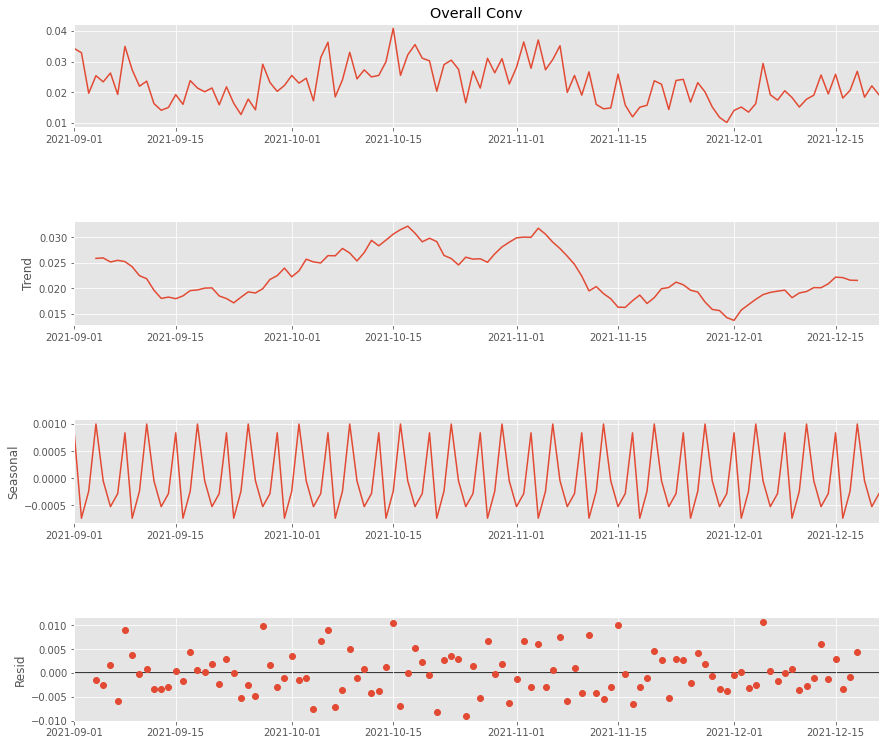

In [279]:
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(ar['Overall Conv'], model='additive') #Seasonal decomposition using moving averages

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

# Rolling Mean

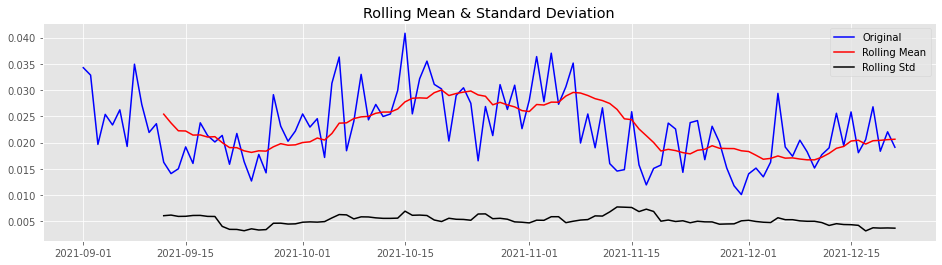

In [280]:
def roll_stats(timeseries, window = 12, cutoff = 0.01):
    
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
   # plt.rcParams['agg.path.chunksize'] = 50000
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
roll_stats(ar['Overall Conv']) 

* The Mean seems to be non where the mean is not been constant even though we can do some Test to known it is stationary or not.
---

In [281]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [282]:
ar.rename(columns = {'Overall Conv':'Overall_Conv'}, inplace = True)

## ADF Test

In [293]:
result=adfuller (ar)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

print("------------------------")

if result[1] < 0.05:
  print('The data is stationary')
else:
  print('The data is non-stationary.')

Test Statistic: -1.874358
p-value: 0.344218
Critical values:
	1%: -3.495
	5%: -2.890
	10%: -2.582
------------------------
The data is non-stationary.


* As the ADF test statics is greater then the critical value becomes the reason to not reject the null hypothesis. This indicates that the data is non-stationary.
---

## KPSS Test

In [294]:
from statsmodels.tsa.stattools import kpss
result_kpss_ct_log=kpss(ar,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

print("---------------------")

if result_kpss_ct_log[1] < 0.05:
  print('The data is stationary')
else:
  print('The data is non-stationary.')

Test Statistic: 0.120000
p-value: 0.092176
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
---------------------
The data is non-stationary.


* As the test statistics value is greater than the critical value, the null hypothesis is rejected. This indicates that the data is non-stationary.

---






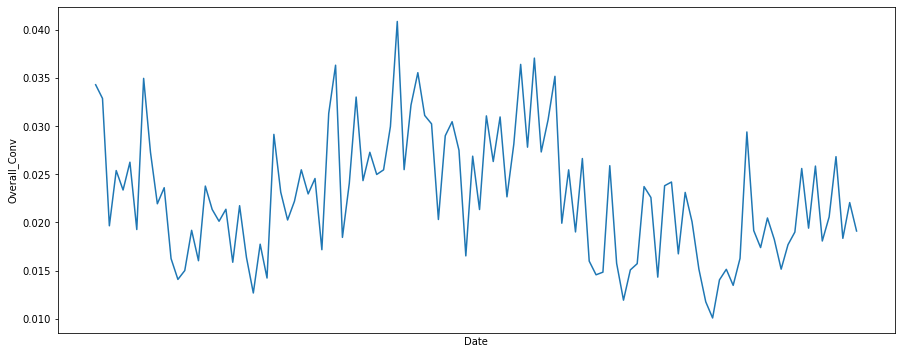

In [146]:
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=ar,x='Date',y='Overall_Conv')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

# Nomalizing Mean 

In [147]:
df_log=np.sqrt(ar['Overall_Conv'])
df_diff=df_log.diff().dropna()

In [148]:
df_diff.head()

Date
2021-09-02   -0.003877
2021-09-03   -0.041101
2021-09-04    0.019134
2021-09-05   -0.006462
2021-09-06    0.009159
Name: Overall_Conv, dtype: float64

In [149]:
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -5.856802
p-value: 0.000000
Critical values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


* As the ADF test statics is lesser then the critical value becomes the reason to reject the null hypothesis. This indicates that the data is stationary.
---

In [150]:
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

print("---------------------")

if result_kpss_ct_log[1] < 0.05:
  print('The data is stationary')
else:
  print('The data is non-stationary.')

Test Statistic: 0.080000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


* As the KPSS test statistics value is less than the critical value, the null hypothesis is not rejected. This indicates that the data is stationary.
---

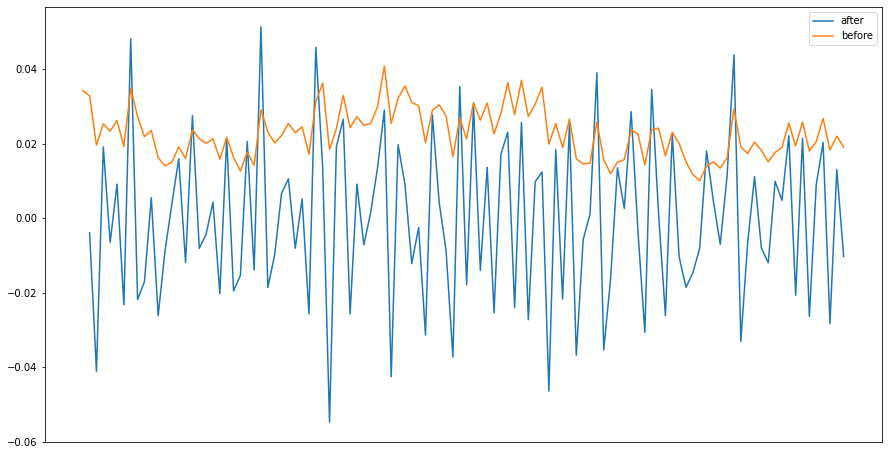

In [151]:
plt.figure(figsize=(15,8))
plt.plot(df_diff,label="after")
plt.plot(ar,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show()

In [152]:
df_diff

Date
2021-09-02   -0.003877
2021-09-03   -0.041101
2021-09-04    0.019134
2021-09-05   -0.006462
2021-09-06    0.009159
                ...   
2021-12-17    0.008987
2021-12-18    0.020355
2021-12-19   -0.028317
2021-12-20    0.013063
2021-12-21   -0.010284
Name: Overall_Conv, Length: 111, dtype: float64

# Train test Spliting

In [167]:
df_diff.index.name=None
train_ar = df_diff.loc[:'2021-11-28']
test_ar = df_diff.loc['2021-11-29':]

print(len(df_diff))
print(len(train_ar))
print(len(test_ar))

111
88
23


In [166]:
train_ar

2021-09-02   -0.003877
2021-09-03   -0.041101
2021-09-04    0.019134
2021-09-05   -0.006462
2021-09-06    0.009159
                ...   
2021-11-24    0.001243
2021-11-25   -0.026159
2021-11-26    0.022647
2021-11-27   -0.010366
2021-11-28   -0.018541
Name: Overall_Conv, Length: 88, dtype: float64

# ARIMA

In [154]:
from sklearn import metrics
import itertools
# defining a range for p, d, q

p = range(0,9)
d = range(0,9)
q = range(0,9)

# creating a list of different combinations of p,d,q
pdq_combination = list(itertools.product(p,d,q))

# creating a list for rmse and order of p,d,q
rmse = []
order = []
r2 = []
for pdq in pdq_combination:
  try:
    model = ARIMA(train_ar, order=pdq).fit()
    prediction = model.predict(start = len(train_ar), end = len(ar)-1)
    rmse_err = np.sqrt(metrics.mean_squared_error(test_ar, prediction))
    r2_err = metrics.r2_score(test_ar, prediction)
    rmse.append(rmse_err)
    order.append(pdq)
    r2.append(r2_err)
  except:
    continue

results = pd.DataFrame(index = order, columns=['RMSE'], data=rmse)
results.index.name='p d q'

In [173]:
prediction_test = model.predict(start=len(train_ar), end = len(df_diff)-1)
prediction_test.head()

2021-11-29    0.056179
2021-11-30   -0.092928
2021-12-01    0.054134
2021-12-02    0.014422
2021-12-03   -0.050428
Freq: D, dtype: float64

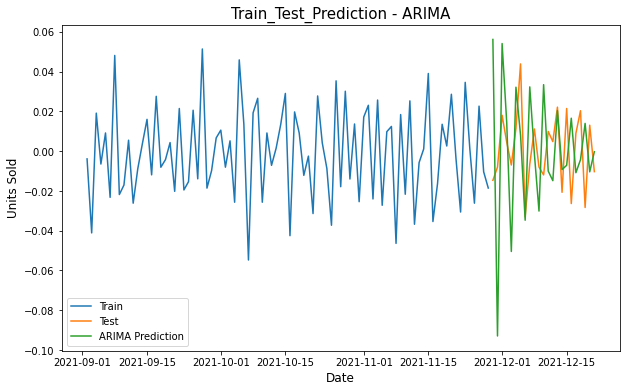

In [174]:
plt.figure(figsize=(10,6))
plt.plot(train_ar,label='Train')
plt.plot(test_ar, label='Test')
plt.plot(prediction_test, label='ARIMA Prediction')
plt.xlabel('Date', size=12)
plt.ylabel('Units Sold', size=12)
plt.title('Train_Test_Prediction - ARIMA', size=15)
plt.legend()
plt.show()

In [381]:
final_model_arima = ARIMA(df_diff, order=(1,1,0)).fit()
pred_future_arima = final_model_arima.predict(start=len(df_diff), end=len(df_diff)+2)

In [382]:
# predicted values of the future without factoring in the Seasonality
pred_future_arima

2021-12-22    0.015408
2021-12-23   -0.009731
2021-12-24    0.006575
Freq: D, dtype: float64

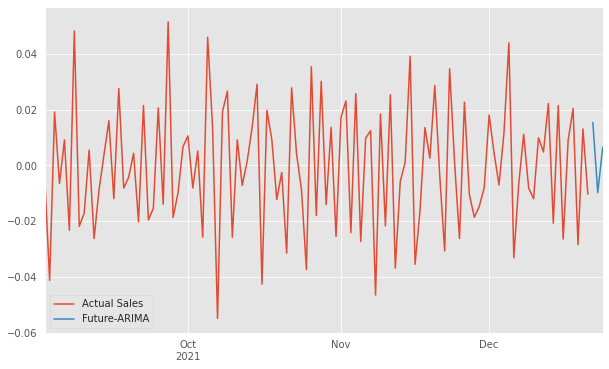

In [383]:
df_diff.plot(legend=True, label='Actual Sales', figsize=(10,6))
pred_future_arima.plot(legend=True, label='Future-ARIMA', figsize=(10,6))
plt.legend(loc='best')
plt.show()

In [214]:
df_diff

2021-09-02   -0.003877
2021-09-03   -0.041101
2021-09-04    0.019134
2021-09-05   -0.006462
2021-09-06    0.009159
                ...   
2021-12-17    0.008987
2021-12-18    0.020355
2021-12-19   -0.028317
2021-12-20    0.013063
2021-12-21   -0.010284
Name: Overall_Conv, Length: 111, dtype: float64

In [384]:
mse_ar = metrics.mean_squared_error(test_ar, prediction_test)
rmse_ar = np.sqrt(metrics.mean_squared_error(test_ar, prediction_test))
mae_ar = metrics.mean_absolute_error(test_ar, prediction_test)
mape_ar = metrics.mean_absolute_percentage_error(test_ar, prediction_test)
r2_ar = metrics.r2_score(test_ar,prediction_test)

# SARIMAX

In [375]:
# defining seasonal order by trial and error. Started with 12 

sarima_model = SARIMAX(df_diff, order=(2,1,1), seasonal_order=(2,1,1,12)).fit()
predict_seasonal_test = sarima_model.predict(start=len(train_ar), end=len(df_diff)-1)
predict_seasonal_future = sarima_model.predict(start=len(df_diff), end=len(df_diff)+2)

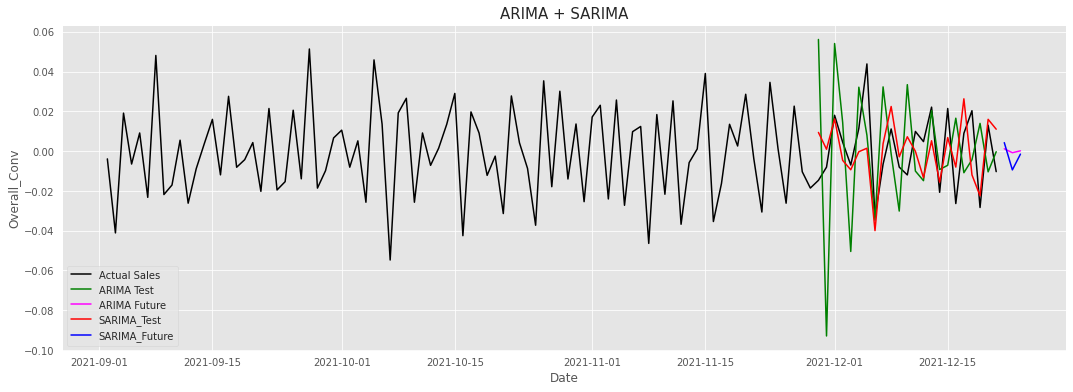

In [379]:
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.plot(df_diff, label='Actual Sales', color='black')
plt.plot(prediction_test, label='ARIMA Test', color='green')
plt.plot(pred_future_arima, label='ARIMA Future', color='magenta')
plt.plot(predict_seasonal_test, label='SARIMA_Test', color='red')
plt.plot(predict_seasonal_future, label='SARIMA_Future', color='blue')
plt.title('ARIMA + SARIMA', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Overall_Conv', fontsize=12)
plt.legend(loc='best')
plt.show()

In [376]:
r2_sar = metrics.r2_score(test_ar, predict_seasonal_test)
rmse_sar = np.sqrt(metrics.mean_squared_error(test_ar, predict_seasonal_test))

In [385]:
results_dict = {'R2': [r2_ar, r2_sar], 'RMSE':[rmse_ar, rmse_sar]}
results_dict = pd.DataFrame(results_dict, index=['ARIMA','SARIMA'])
results_dict = results_dict.sort_values(by=['R2','RMSE'], ascending=[False, True])

In [ ]:
# Rounding off results

# def rounding(x):
#   a = round(x,2)
#   return a
# for i in results_dict.columns:
#   results_dict[i] = results_dict[i].apply(lambda x: rounding(x))

# results_dict